In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize pixel values to [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
# Reshape data to (samples, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Define LeNet architecture
model = models.Sequential([
    # C1: Convolutional layer
    layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1), padding='same'),

    # S2: Average Pooling
    layers.AveragePooling2D(pool_size=(2, 2), strides=2),

    # C3: Convolutional layer
    layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'),

    # S4: Average Pooling
    layers.AveragePooling2D(pool_size=(2, 2), strides=2),

    # Flatten layer
    layers.Flatten(),

    # C5: Fully connected layer
    layers.Dense(120, activation='tanh'),

    # F6: Fully connected layer
    layers.Dense(84, activation='tanh'),

    # Output layer
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step - accuracy: 0.8030 - loss: 0.6622 - val_accuracy: 0.9635 - val_loss: 0.1357
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 72ms/step - accuracy: 0.9526 - loss: 0.1536 - val_accuracy: 0.9755 - val_loss: 0.0833
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 66ms/step - accuracy: 0.9708 - loss: 0.0921 - val_accuracy: 0.9800 - val_loss: 0.0670
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.9814 - loss: 0.0622 - val_accuracy: 0.9803 - val_loss: 0.0658
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.9852 - loss: 0.0478 - val_accuracy: 0.9808 - val_loss: 0.0622
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.9879 - loss: 0.0389 - val_accuracy: 0.9845 - val_loss: 0.0522
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.9906 - loss: 0.0305 - val_accuracy: 0.9852 - val_loss: 0.0466
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9910 - loss: 0.0273 - 

In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc * 100:.2f}%')

313/313 - 3s - 10ms/step - accuracy: 0.9857 - loss: 0.0484

Test accuracy: 98.57%


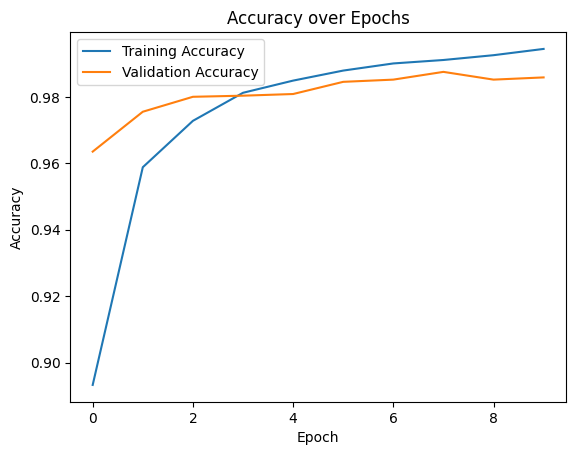

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()